In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import pandas as pd
import seaborn as sns

import viztsne

In [9]:
plt.style.use(["science", "ieee"])
plt.rcParams["ytick.right"] = False
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.4
plt.rcParams["legend.columnspacing"] = 1.0

In [158]:
# feet, LH, RH, tongue
X, Y = viztsne.load_data("BNCI2014001", 1, preprocess=True)

BNCI2014001 1 (576, 3, 576) -2.586448e-05 0.96978986


In [159]:
transformed_data = viztsne.get_transformed_data(X, Y)

# Join
X_all = np.concatenate([X for X, _ in transformed_data.values()])
Y_all = np.concatenate([Y for _, Y in transformed_data.values()])
N = []
for transform_name in transformed_data.keys():
    N.extend([transform_name] * len(X))
N = np.array(N)

In [104]:
legend_order = [
    "sliding-window-x",
    "gaussian",
    "amplitude-perturbation-15", #"stft-gaussian-2",
    "stft-recombination",
    "emd",
    "sliding-recombination",
    "None",
]
legend_labels = [
    "SW",
    "NA",
    "AP",
    "SR",
    "EMD",
    "SW+SR",
    "Baseline",
]

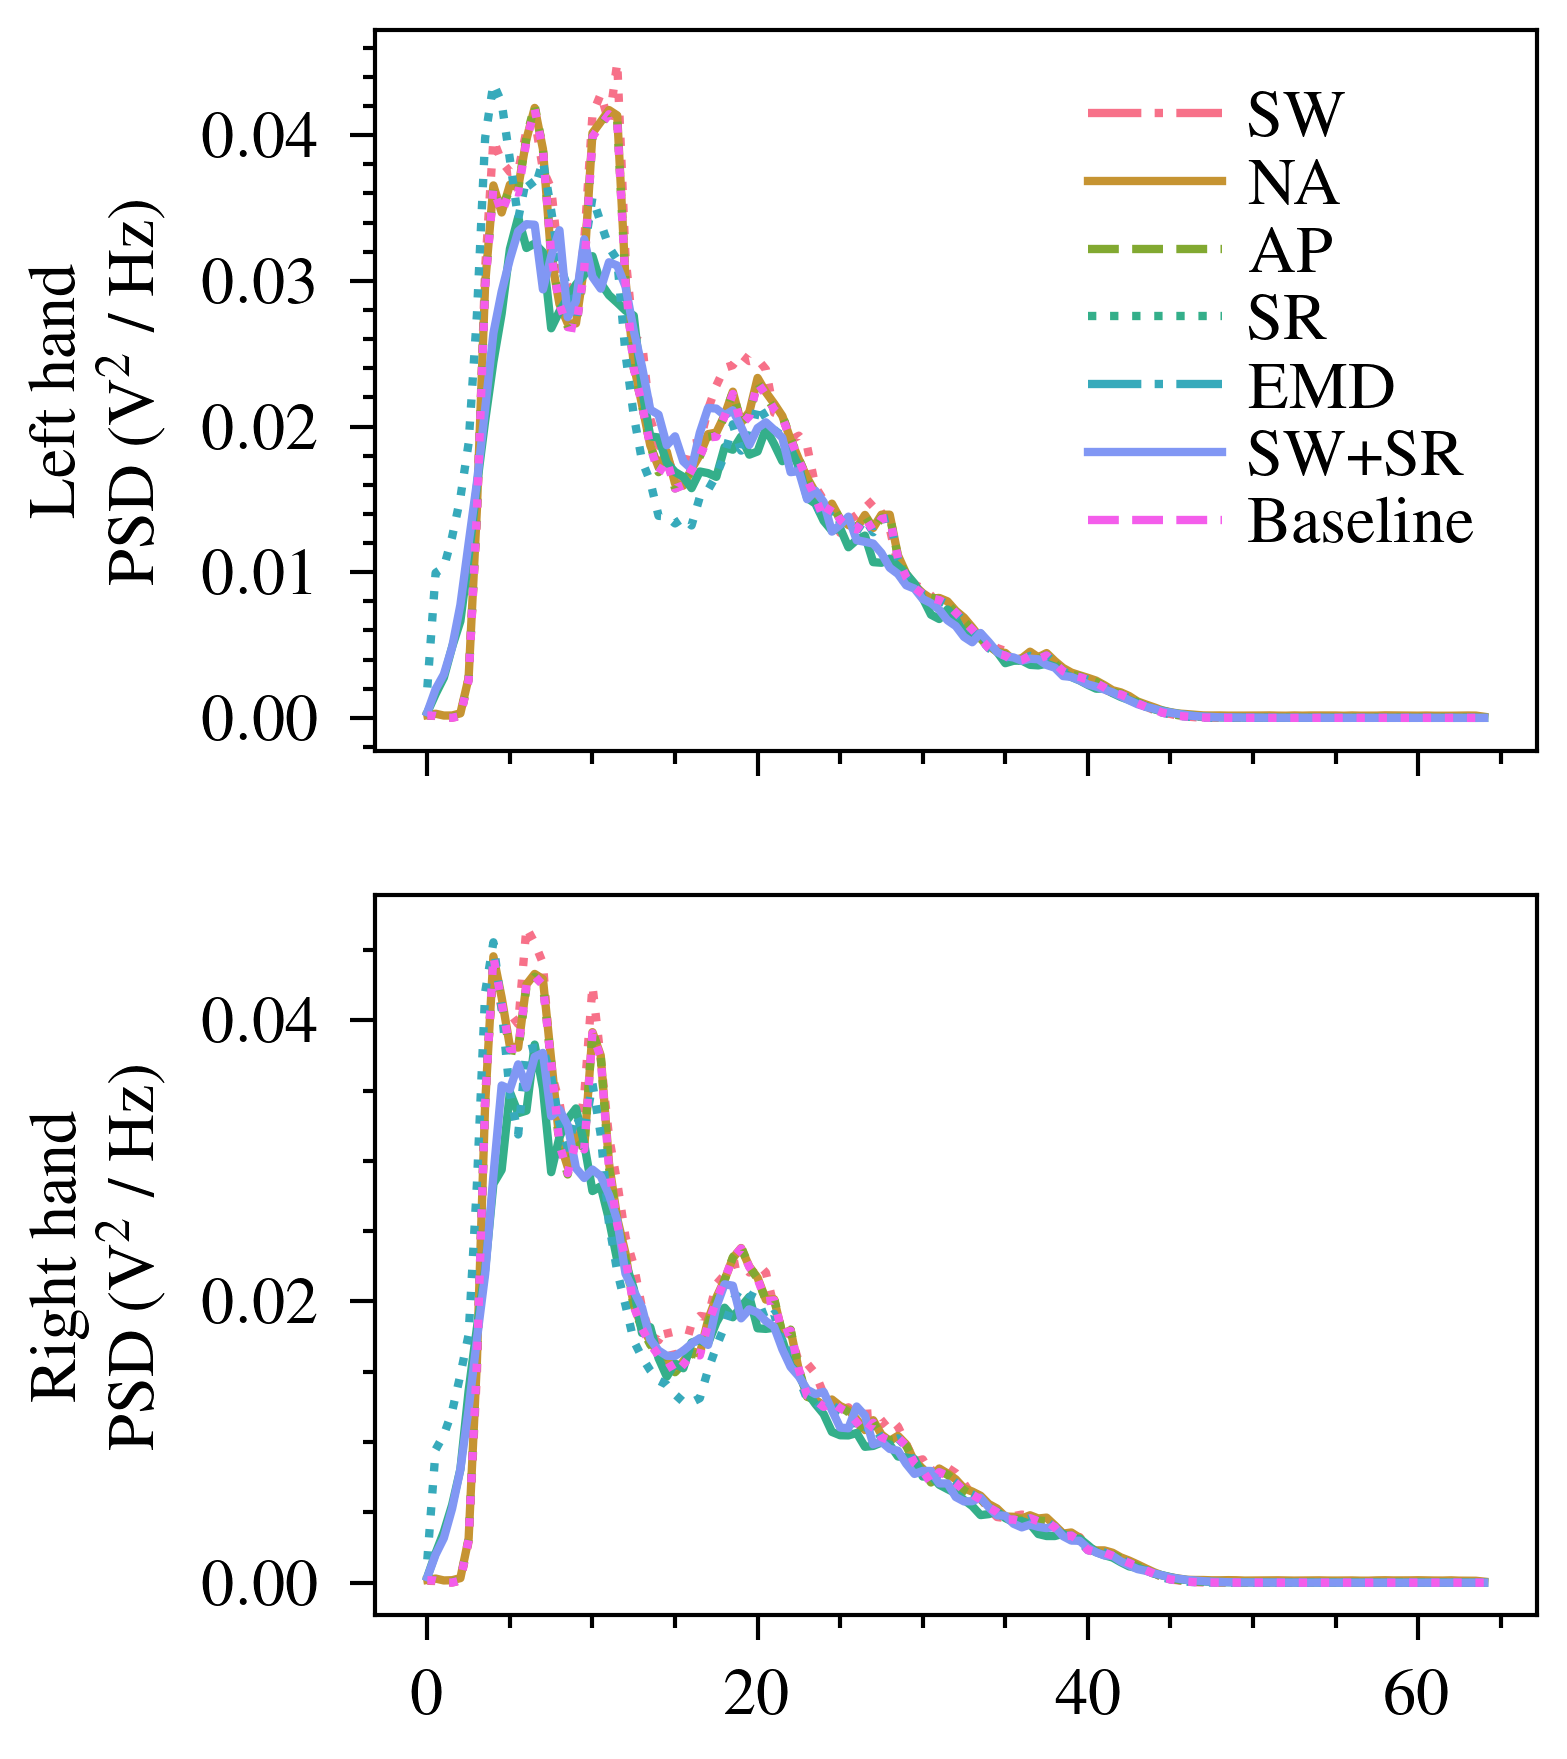

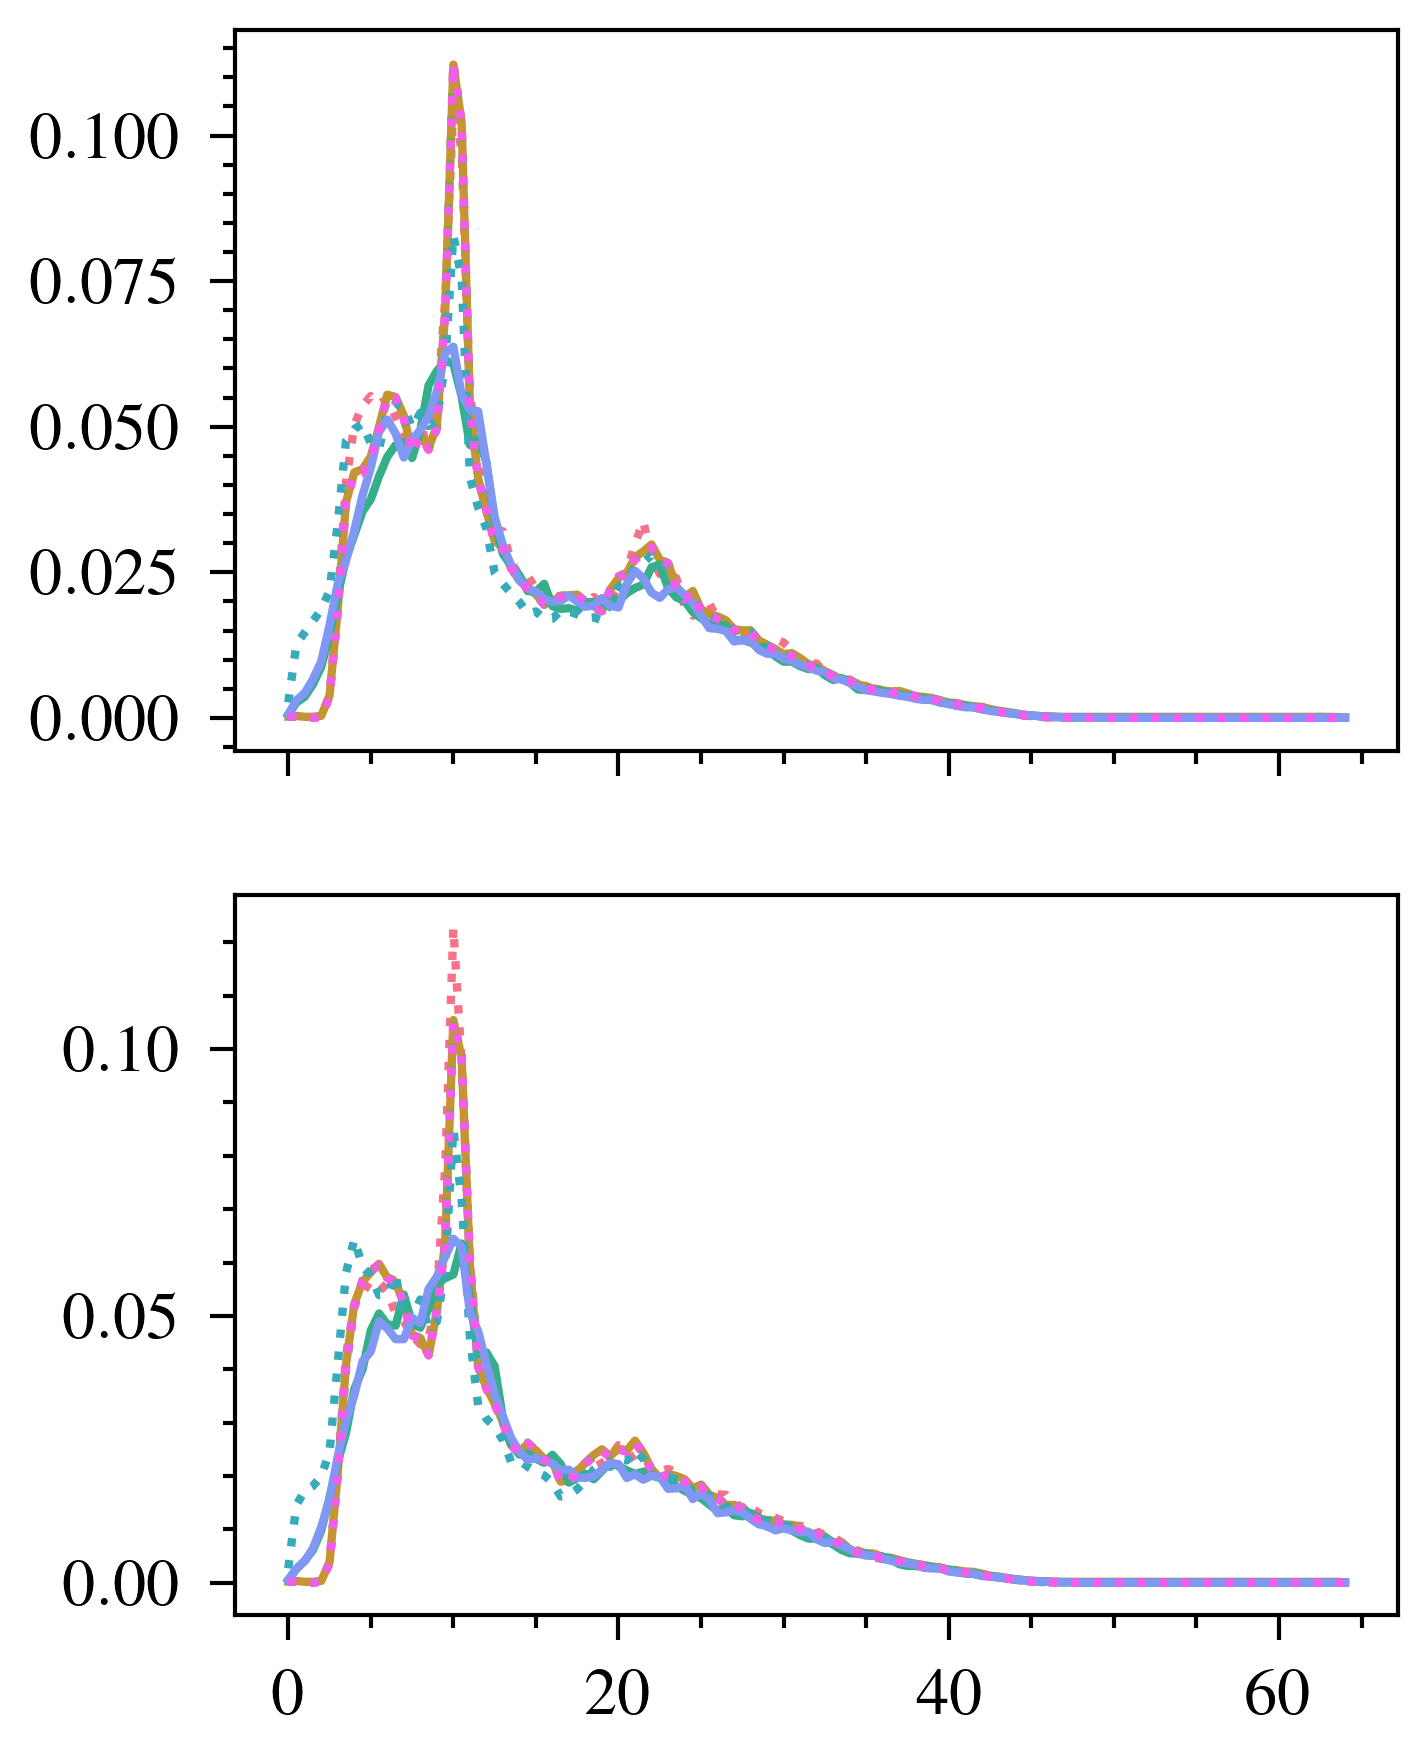

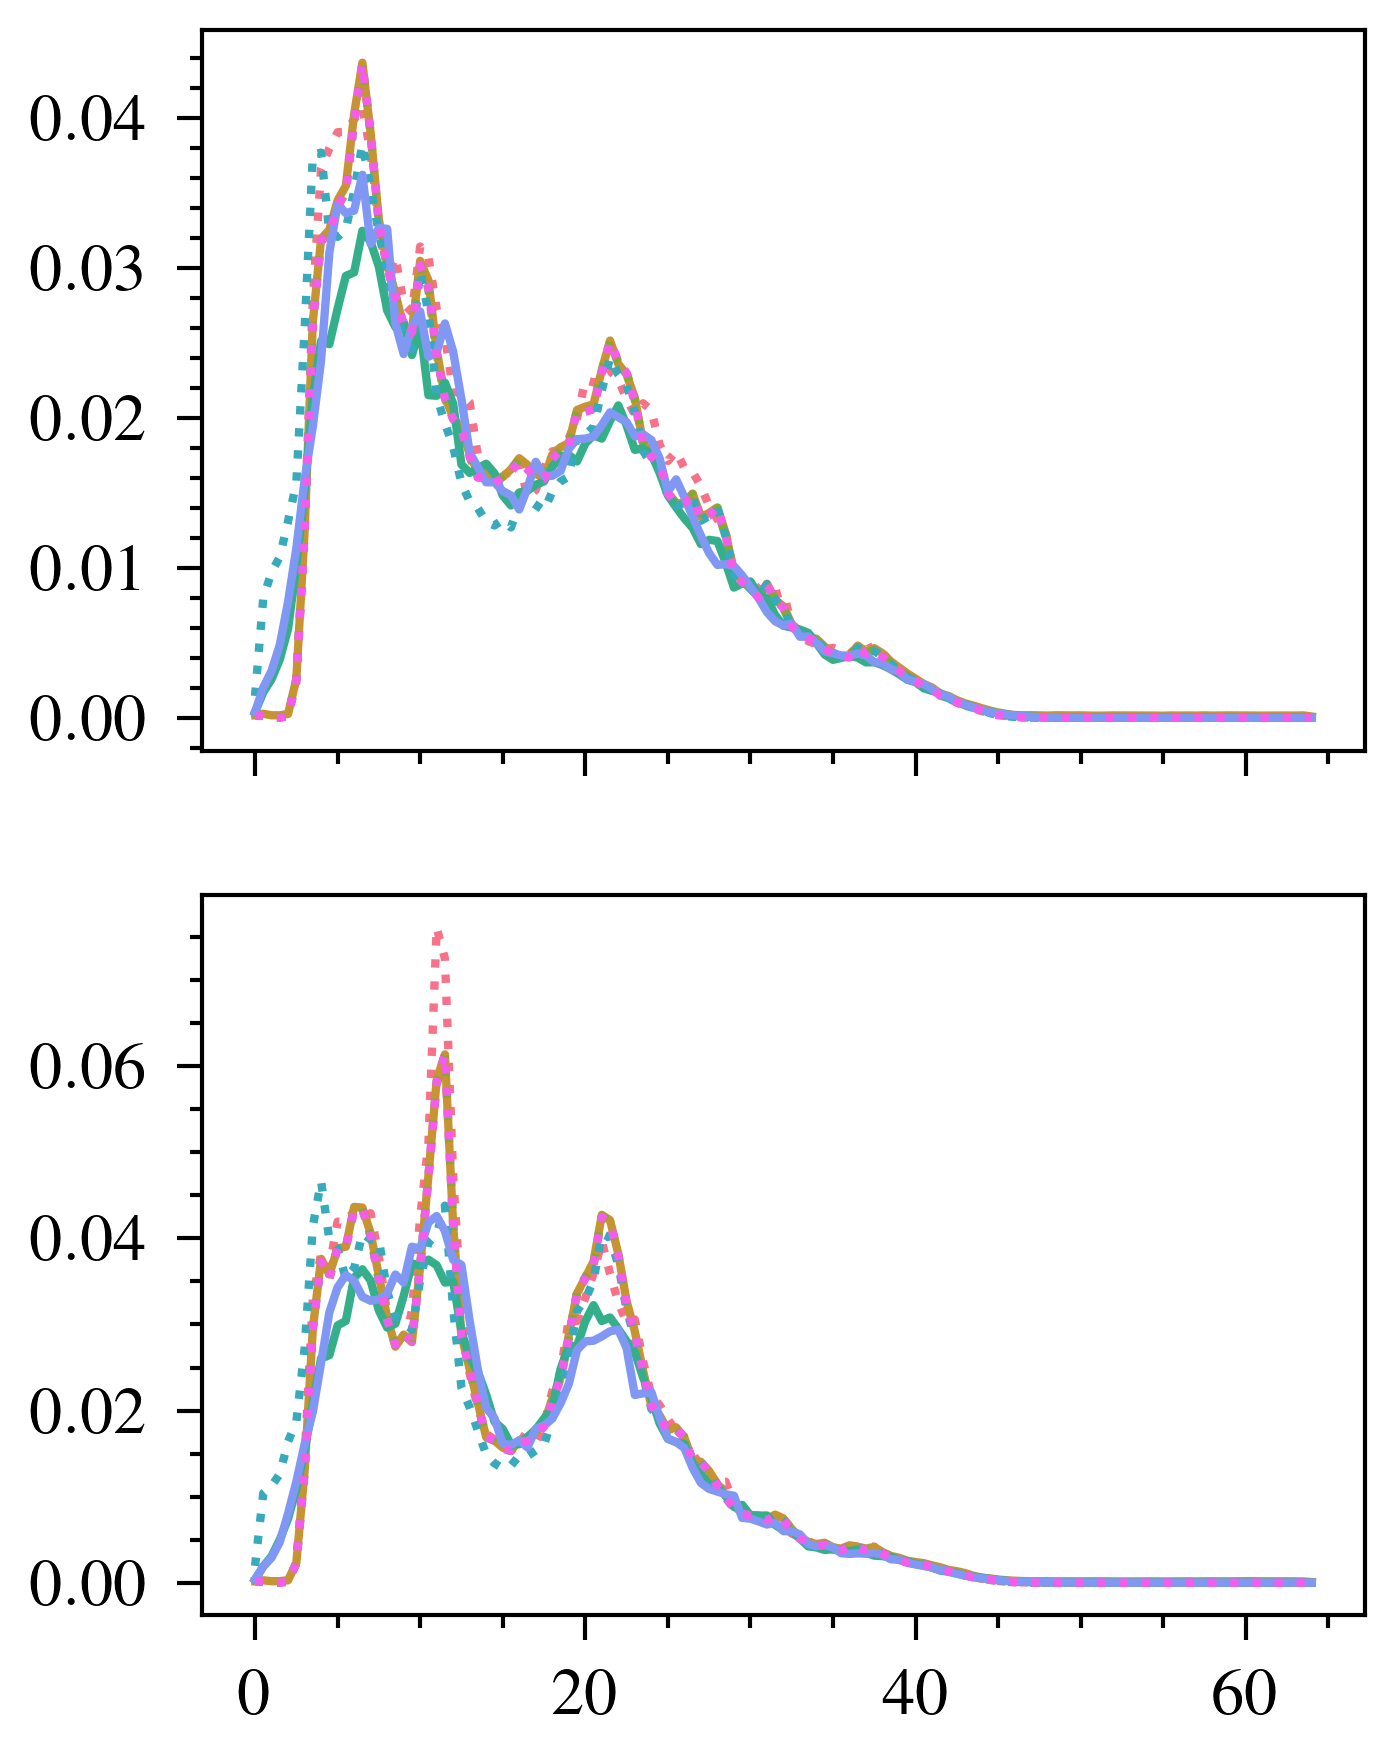

In [157]:
import mne

for ch in range(3):
    fig, ax = plt.subplots(figsize=(2.5, 3.5), nrows=2, sharex=True)
    for i, task in enumerate([0, 1]):
        x_ = []
        y_ = []
        h_ = []
        for j, name in enumerate(sorted(list(set(N)))):
            X_ = X_all[(N == name)][(Y == task)]
            psds, freqs = mne.time_frequency.psd_array_welch(
                X_, sfreq=128, average=None
            )
            x_.append(freqs)
            y_.append(psds[:, ch, :, 0].mean(axis=0))
            h_.append([name] * len(freqs))
        g = sns.lineplot(
            x=np.concatenate(x_),
            y=np.concatenate(y_),
            ax=ax[i],
            hue=np.concatenate(h_),
            hue_order=legend_order
        )
        # g.set_ylim(0, 0.12)
        if ch == 0:
            g.set_ylabel(f"{'Left hand' if task == 0 else 'Right hand'}\nPSD (V$^2$ / Hz)")
        # if ch > 0:
        #     g.set_yticklabels([])
        if ch == 0 and i == 0:
            for t, l in zip(g.get_legend().texts, legend_labels):
                t.set_text(l)
        else:
            g.get_legend().remove()
    fig.savefig(f"../data/psd_2b_{ch}.pdf", bbox_inches="tight")

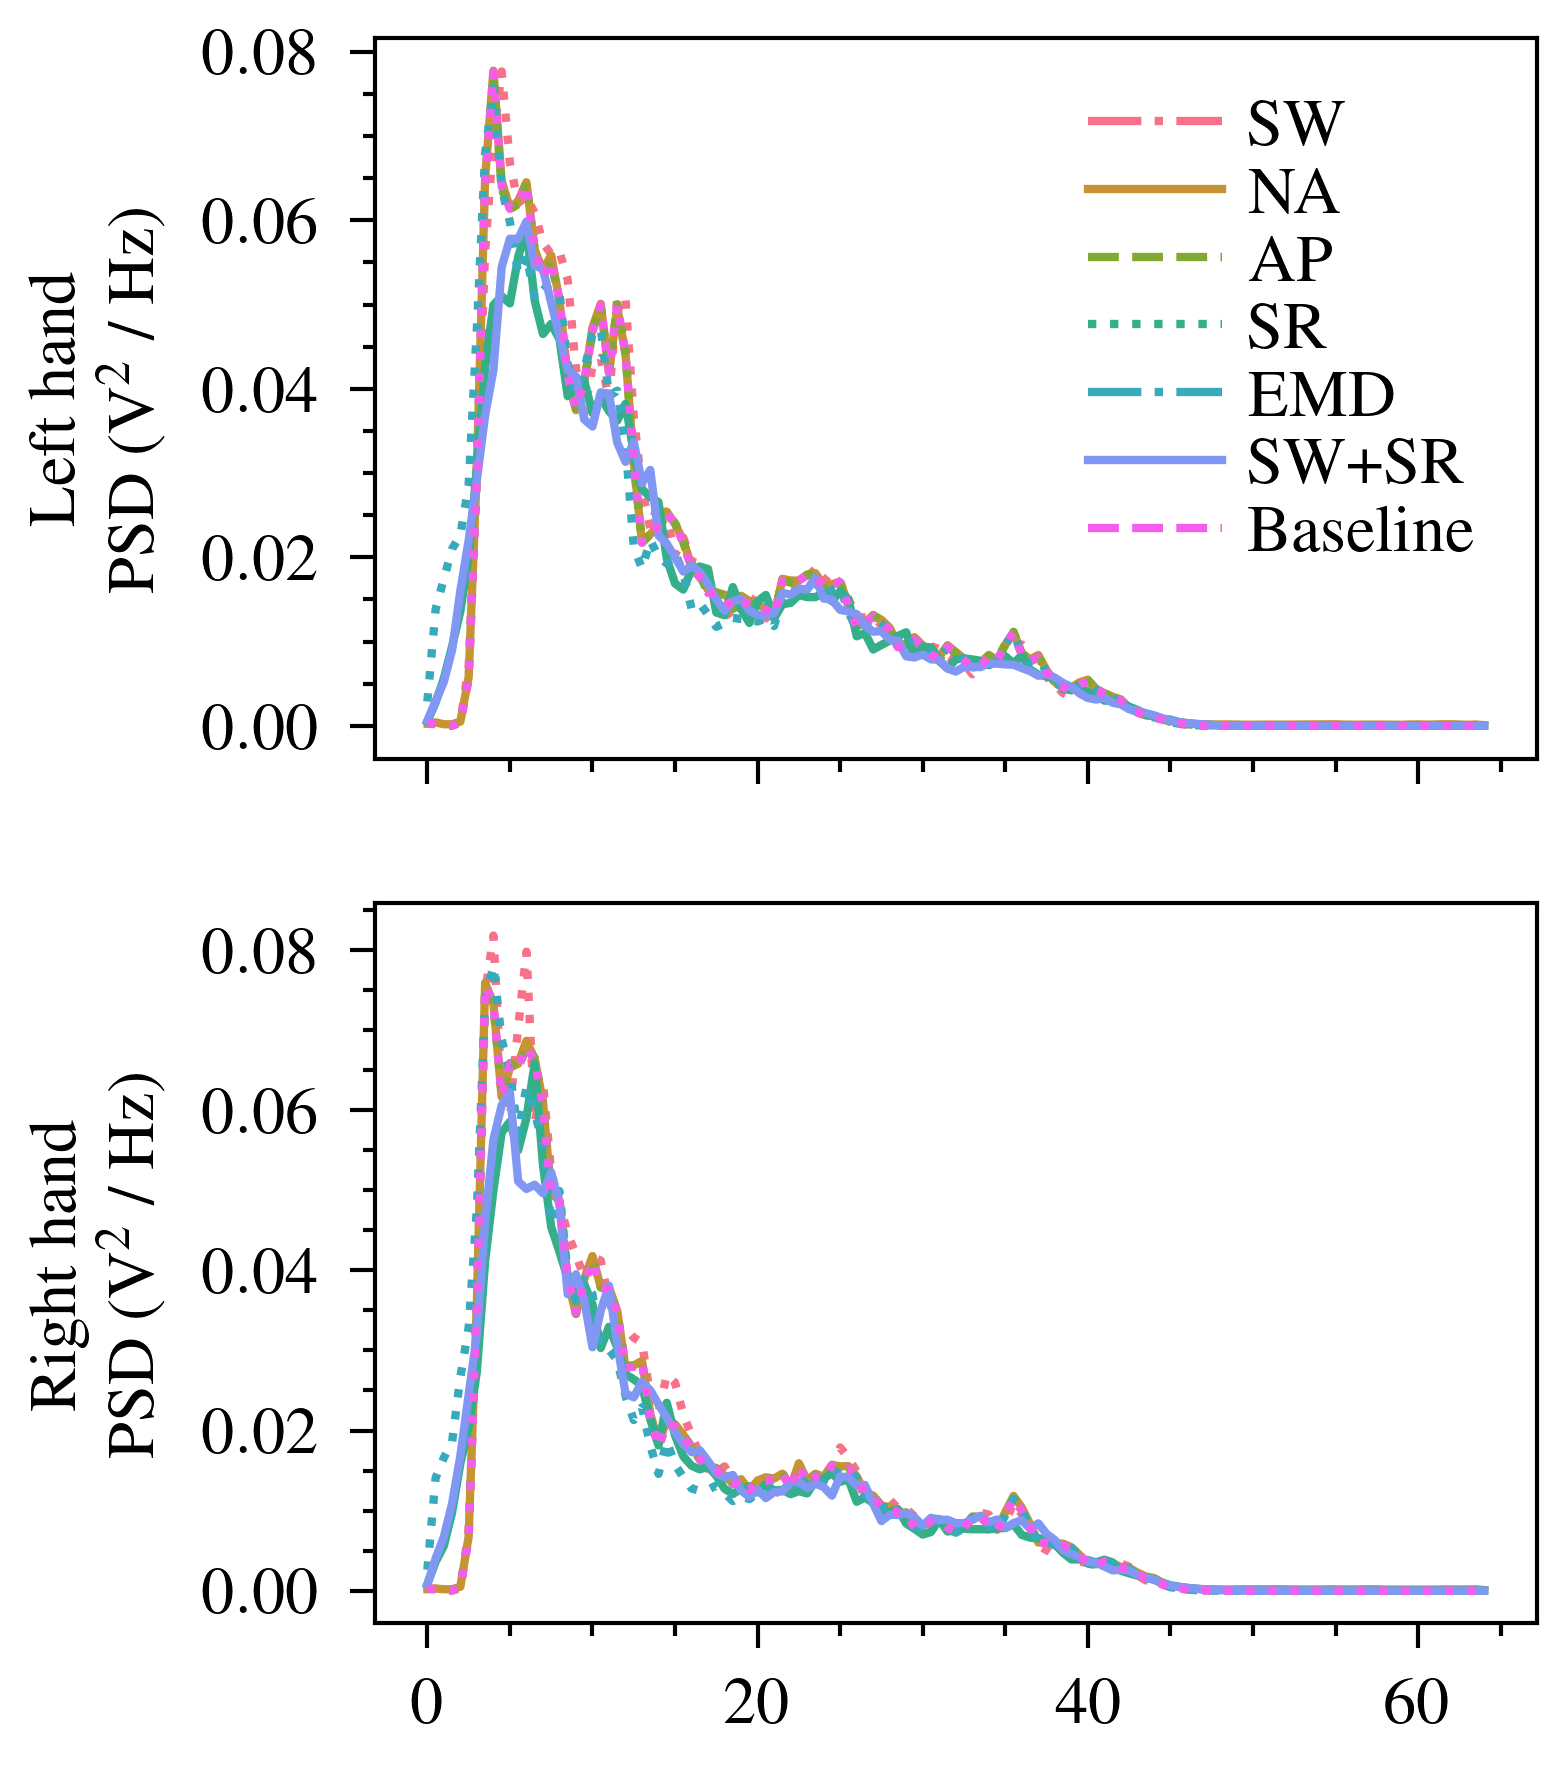

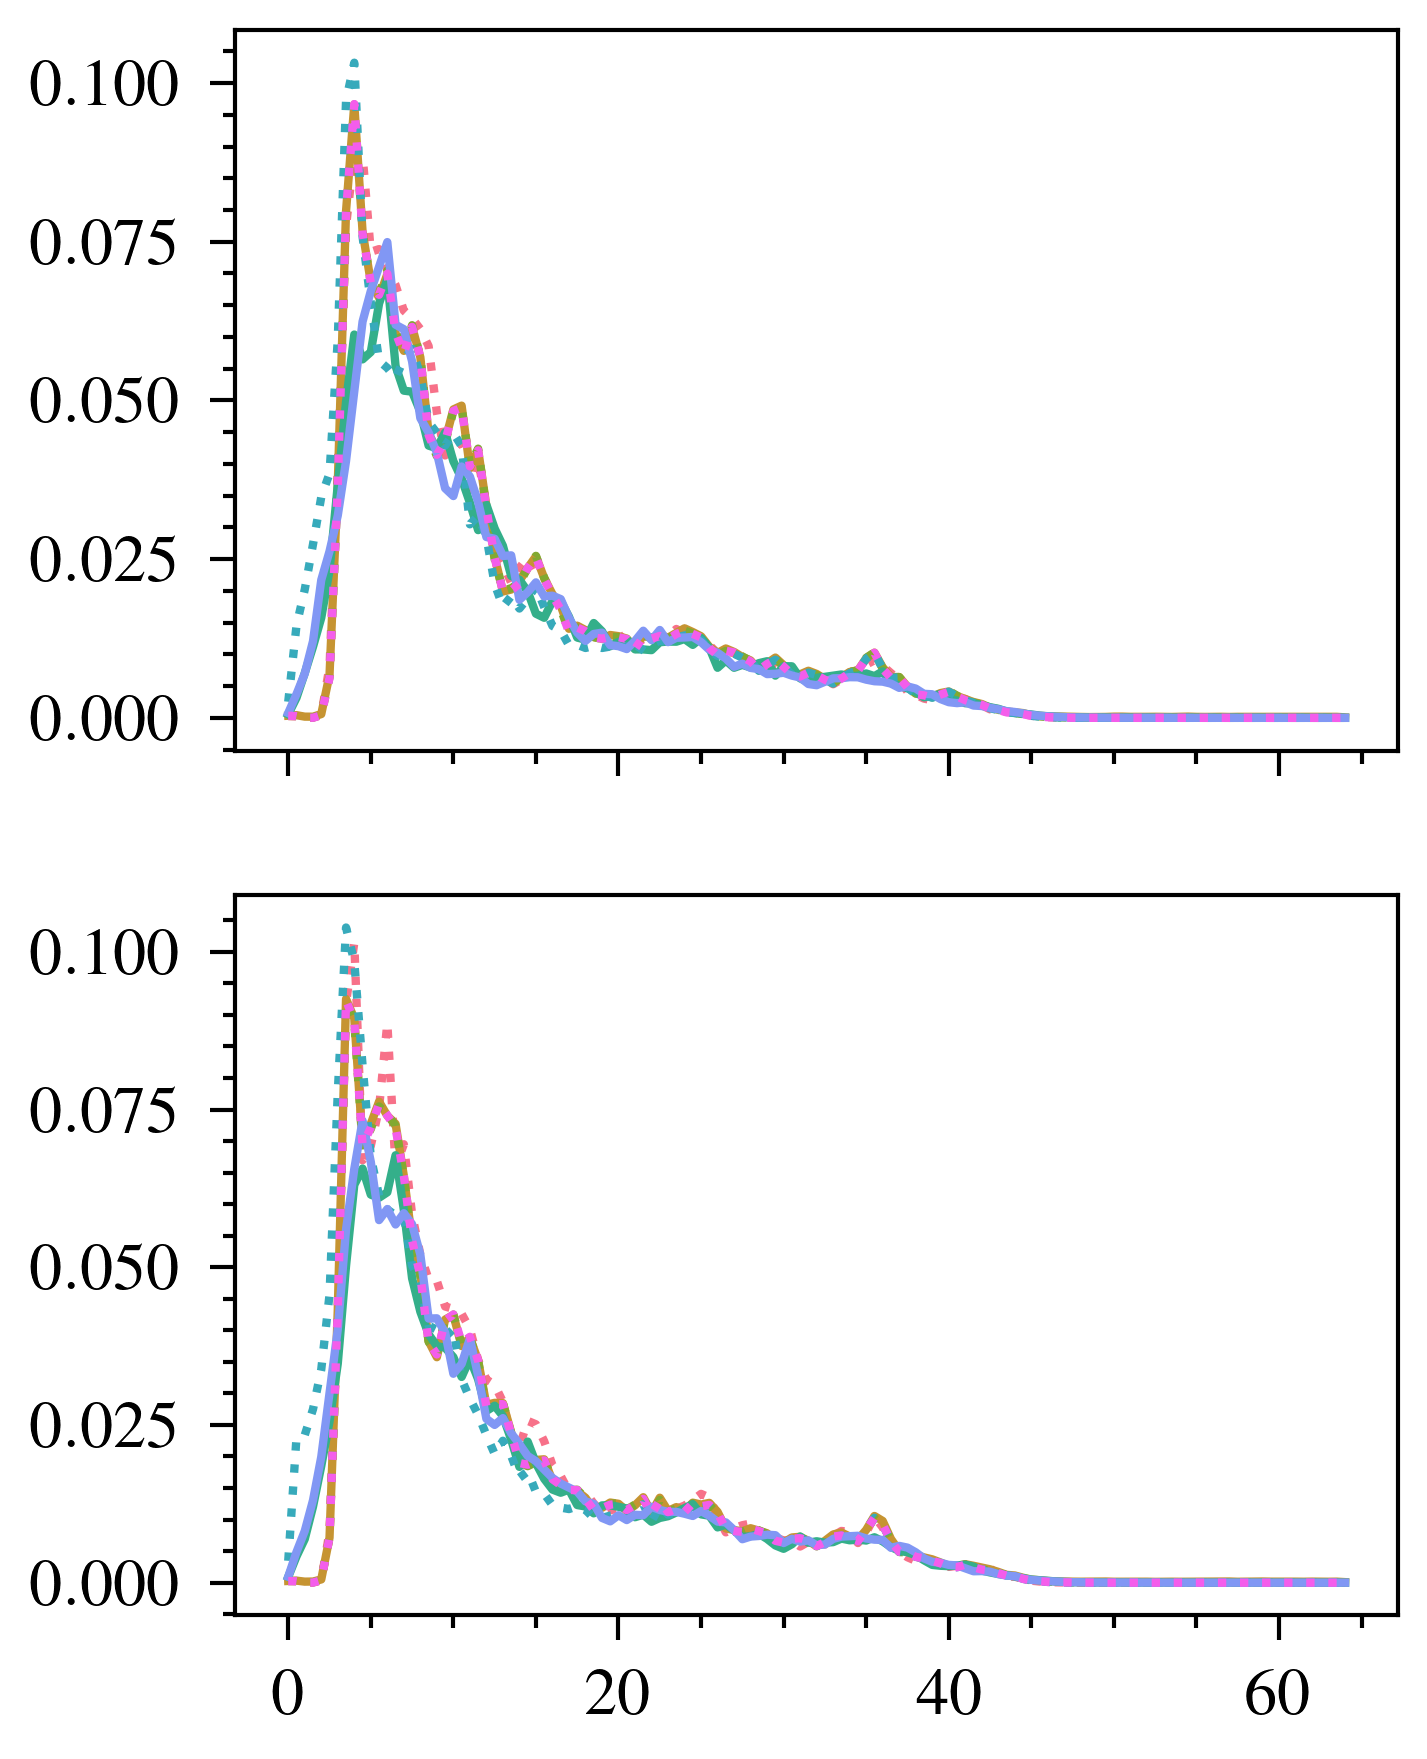

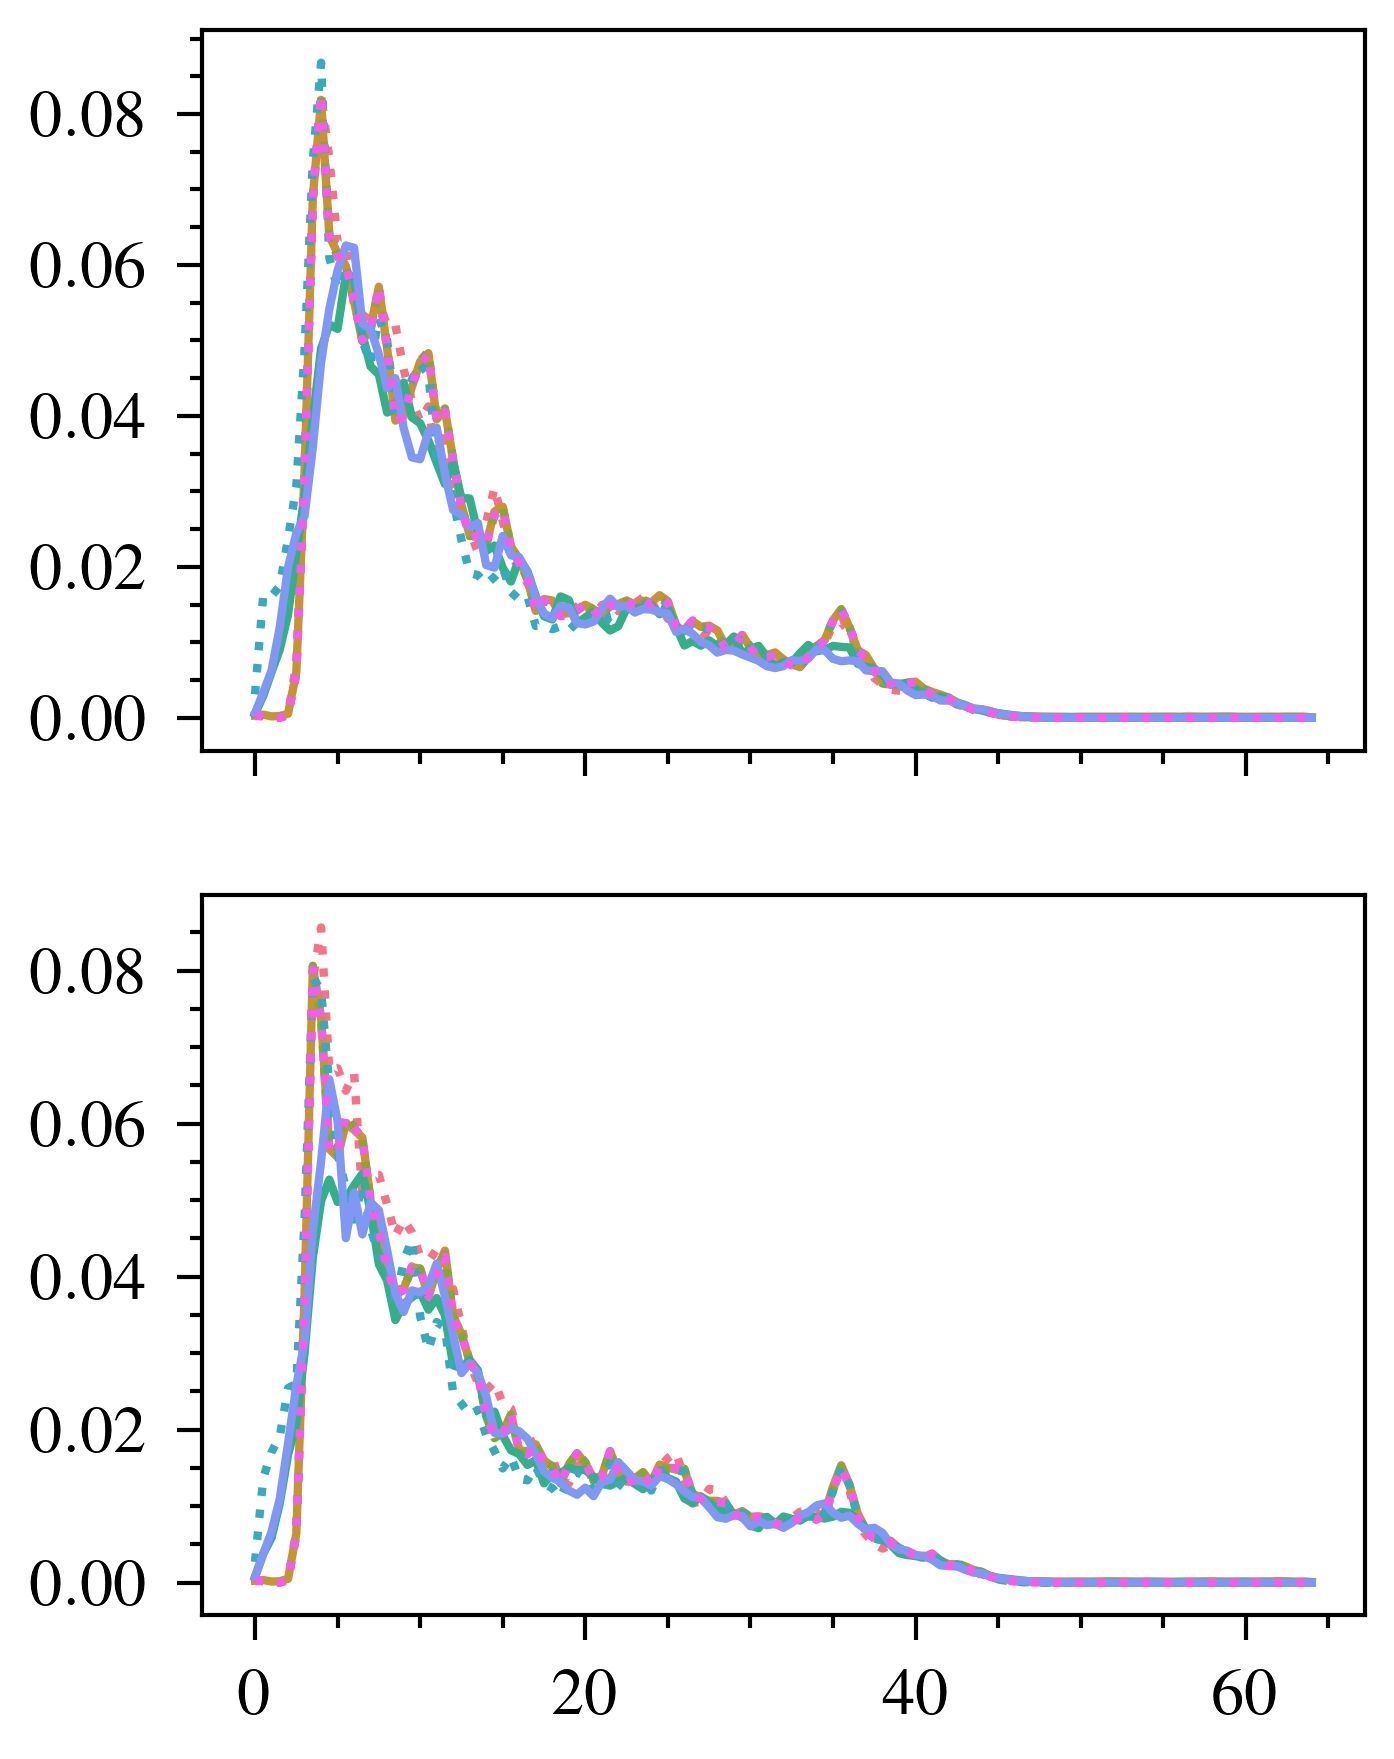

In [161]:
import mne

for ch in range(3):
    fig, ax = plt.subplots(figsize=(2.5, 3.5), nrows=2, sharex=True)
    for i, task in enumerate([1, 2]):
        x_ = []
        y_ = []
        h_ = []
        for j, name in enumerate(sorted(list(set(N)))):
            X_ = X_all[(N == name)][(Y == task)]
            psds, freqs = mne.time_frequency.psd_array_welch(
                X_, sfreq=128, average=None
            )
            x_.append(freqs)
            y_.append(psds[:, ch, :, 0].mean(axis=0))
            h_.append([name] * len(freqs))
        g = sns.lineplot(
            x=np.concatenate(x_),
            y=np.concatenate(y_),
            ax=ax[i],
            hue=np.concatenate(h_),
            hue_order=legend_order
        )
        # g.set_ylim(0, 0.11)
        if ch == 0:
            g.set_ylabel(f"{'Left hand' if task == 1 else 'Right hand'}\nPSD (V$^2$ / Hz)")
        # if ch > 0:
        #     g.set_yticklabels([])
        if ch == 0 and i == 0:
            for t, l in zip(g.get_legend().texts, legend_labels):
                t.set_text(l)
        else:
            g.get_legend().remove()
    fig.savefig(f"../data/psd_2a_{ch}.pdf", bbox_inches="tight")